In [1]:
import numpy as np          
import pandas as pd     
import matplotlib.pyplot as plt              
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [4]:
data=pd.read_csv('data.csv', header=None)
data.columns=['x_val', 'y_val']

<Axes: xlabel='x_val', ylabel='y_val'>

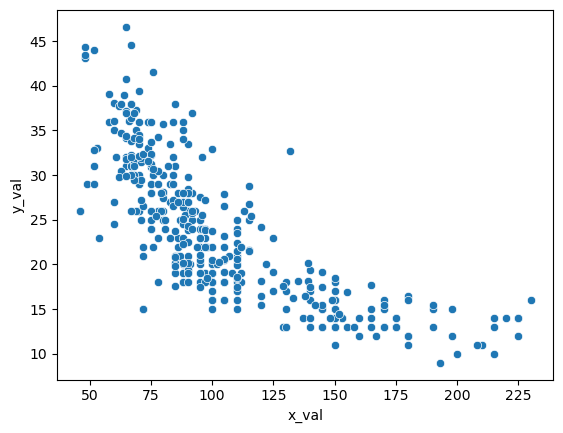

In [8]:
sns.scatterplot(x='x_val', y='y_val', data=data)


In [27]:
# scaling the data

data['x_val']= (data['x_val']-data['x_val'].mean())/ data['x_val'].std()
data['y_val']= (data['y_val']-data['y_val'].mean())/ data['y_val'].std()


In [28]:
x=data.iloc[:,:-1].values
y=data.iloc[:,-1].values.reshape(-1,1)




In [29]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=42)

In [30]:
# convert on polynomial features

def polynomial_features(x, degree):
    return  np.hstack([x**i for i in range(degree+1)])

In [62]:
class linear_regression:

    def __init__(self, epoch, alpha):
        self.epoch=epoch
        self.alpha=alpha
        self.weight=None
        self.cost_array=[]
        self.training_error=[]
        self.test_error=[]

    def fit(self, x,y):
        sample, features=x.shape
        self.weight=np.zeros((features,1))

        for i in range(self.epoch):
            x_theta=x.dot(self.weight)
            error=x_theta-y  
            gradient=(1/sample)*x.T.dot(error)
            cost=(1/(2*sample))*np.sum(error**2)
            self.cost_array.append(cost)
            self.weight-=self.alpha*gradient
            self.training_error.append(np.sqrt(cost))
           


    

    def predict(self, x):
        
        y_pred=x.dot(self.weight)
        return y_pred
    

In [32]:
y_train.shape

(313, 1)

In [75]:
x_train_trans=polynomial_features(x_train,2)


model=linear_regression(epoch=1000, alpha=0.01)
model.fit(x_train_trans, y_train)


In [76]:
y_pred=model.predict(polynomial_features(x_test, 2))
print("R2 score :", r2_score(y_test, y_pred))

R2 score : 0.6403168426552652


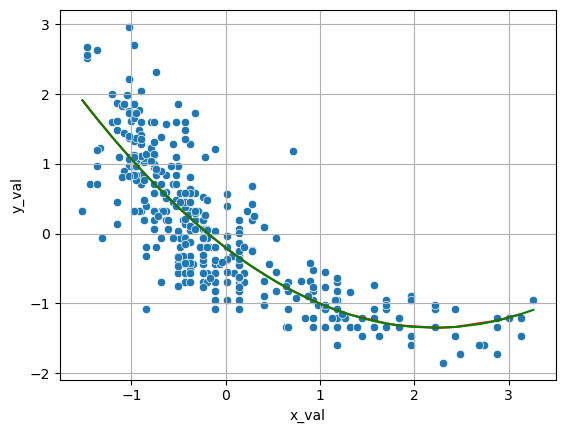

In [77]:
sns.scatterplot(x=data['x_val'], y=data['y_val'])
sns.lineplot(x=x_test.flatten(), y=y_pred.flatten(), color='red')
sns.lineplot(x=x_train.flatten(), y=model.predict(polynomial_features(x_train, 2)).flatten(), color='green')
plt.grid()

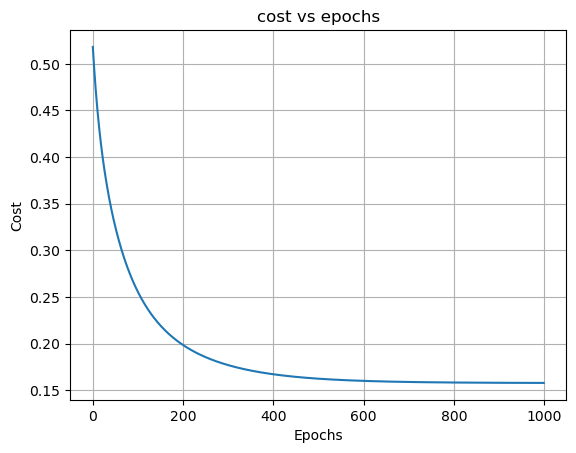

In [78]:
cost= model.cost_array
plt.plot(range(len(cost)), cost)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('cost vs epochs')
plt.grid()
plt.show()